<a href="https://colab.research.google.com/github/rohan-pradhan/BitPlaneSlicingAdversarialDefense/blob/master/CW_AdverserialExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans

    100% |████████████████████████████████| 51kB 2.4MB/s 


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

import os
import time
import re

import tensorflow as tf
from tensorflow.python.platform import flags
import numpy as np
from tensorflow import keras
# import keras
# from tensorflow.keras import backend
import pandas as pd 

from cleverhans.attacks import FastGradientMethod
from cleverhans.dataset import MNIST
from cleverhans.loss import CrossEntropy
from cleverhans.train import train
from cleverhans.utils import AccuracyReport
from cleverhans.utils_keras import cnn_model
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.utils_tf import model_eval
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from cleverhans.attacks import CarliniWagnerL2

import glob
FLAGS = flags.FLAGS

NB_EPOCHS = 6
BATCH_SIZE = 128
LEARNING_RATE = .001
TRAIN_DIR = 'train_dir'
FILENAME = 'mnist.ckpt'
LOAD_MODEL = False




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/ECE1512-FinalProject/saved_models
!ls $pwd
!ls ./drive/My\ Drive/ECE1512-FinalProject/saved_models

# mkdir saved_models

keras_cifar10_trained_model_nonsliced.h5
ls: cannot access '[/content]': No such file or directory
keras_cifar10_trained_model_nonsliced.h5


In [0]:
pwd = !pwd
saved_models_directory = "./drive/My\ Drive/ECE1512-FinalProject/saved_models"
classifier_file_name = "keras_cifar10_trained_model_nonsliced.h5"
# model_path = os.path.join(pwd, saved_models_directory)
# model_path = os.path.join(model_path, classifier_file_name)
# print(model_path)

classifier = tf.keras.models.load_model("keras_cifar10_trained_model_nonsliced.h5")
import random
random.seed = 99

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
# # Args
# FLAGS = flags.FLAGS

# VIZ_ENABLED = True
# BATCH_SIZE = 128
# NB_EPOCHS = 6
# SOURCE_SAMPLES = 10
# LEARNING_RATE = .001
# CW_LEARNING_RATE = .005
# ATTACK_ITERATIONS = 100
# MODEL_PATH = ''
# TARGETED = False

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print (x_test.shape[1:4])
print (type(x_test))


Using TensorFlow backend.


170500096/170498071 [==============================] - 23s 0us/step
(32, 32, 3)
<class 'numpy.ndarray'>


In [0]:
def cw_attack(attack_iterations,src,CW_LEARNING_RATE,folder_num):
    """
    MNIST CleverHans tutorial
    :param train_start: index of first training set example
    :param train_end: index of last training set example
    :param test_start: index of first test set example
    :param test_end: index of last test set example
    :param nb_epochs: number of epochs to train model
    :param batch_size: size of training batches
    :param learning_rate: learning rate for training
    :param train_dir: Directory storing the saved model
    :param filename: Filename to save model under
    :param load_model: True for load, False for not load
    :param testing: if true, test error is calculated
    :param label_smoothing: float, amount of label smoothing for cross entropy
    :return: an AccuracyReport object
    """
    tf.keras.backend.set_learning_phase(0)


    # Set TF random seed to improve reproducibility
    tf.set_random_seed(1234)

#     if not hasattr(backend, "tf"):
#         raise RuntimeError("This tutorial requires keras to be configured"
#                            " to use the TensorFlow backend.")

#     if keras.backend.image_dim_ordering() != 'tf':
#         keras.backend.set_image_dim_ordering('tf')
#         print("INFO: '~/.keras/keras.json' sets 'image_dim_ordering' to "
#               "'th', temporarily setting to 'tf'")

#     img_folder = src+'/*/*.jpg'
    
#     dest_folder = 'CW_Phase'+str(folder_num)+'CW_LR'+str(CW_LEARNING_RATE)    
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)
#     m = dest_folder + '/Male'
#     f = dest_folder + '/Female'
#     if not os.path.exists(m):
#         os.makedirs(m)
#     if not os.path.exists(f):
#         os.makedirs(f)
    
        
#     dest_folder = dest_folder
    

#     x_celeba = np.array(x_test)
    # Obtain Image Parameters

    #ADD RIGHT DATA 
    img_rows, img_cols, nchannels = x_test.shape[1:4]

    #MALE OR FEMALE 
    nb_classes = 10

    # Define input TF placeholder
    x = tf.placeholder(tf.float32, shape=(None, img_rows, img_cols,
                                        nchannels))
    y = tf.placeholder(tf.float32, shape=(None, nb_classes))


    keras_wrapped_model = KerasModelWrapper(classifier)
    
    

    # get session from the model
    sess =keras.backend.get_session()
    # create attack object
    adv_ys = None
    yname = "y"
    VIZ_ENABLED = True
    BATCH_SIZE = 128
    NB_EPOCHS = 6
    SOURCE_SAMPLES = 10
    LEARNING_RATE = .001
    ATTACK_ITERATIONS = attack_iterations

    cw = CarliniWagnerL2(keras_wrapped_model, sess=sess)

    cw_params = {'binary_search_steps': 1,
               yname: adv_ys,
               'max_iterations': ATTACK_ITERATIONS,
               'learning_rate': CW_LEARNING_RATE,
               'batch_size': 10,
               'initial_const': 10}

    adv_x = cw.generate_np(x_test,**cw_params)


    # Consider the attack to be constant
    adv_x = tf.stop_gradient(adv_x) 
    attack_images = adv_x.eval(session =sess)
#     y = np.concatenate([np.ones(50),np.zeros(50)])

    
    adv_pred = classifier.predict_classes(attack_images)
    # accuracy score
    
    acc = accuracy_score(y_test, adv_pred)
    adv_prob = classifier.predict_proba(attack_images)
#     probcsv = dest_folder + '/Pred_prob.csv' 
    
    
#     df = pd.DataFrame(adv_prob)
#     df = pd.concat([pd.Series(addrs),df],axis=1)
#     df.to_csv(probcsv)
    
#     reg = src
    
#     adv_addrs = [re.sub(reg,dest_folder,x) for x in addrs]
  
    file_string = "attack_images_np_" + str(folder_num) +".npy"
    
    np.save(file_string, attack_images)
    
#     for i, a in enumerate(attack_images):
#         plt.imsave(adv_addrs[i],a)


    return(acc)


In [0]:
attack_iterations = 100
CW_LR = [0.005,0.009,0.02,0.04,0.07]
img_folder = 'clean'

In [0]:
accuracy = []
for i,CW_LEARNING_RATE in enumerate(CW_LR):
    print ("Attacking Model with CarliniWagnerL2 Attack with ", str(i), " learning rate.")
    start = time.time()
    acc = cw_attack(100,img_folder,CW_LEARNING_RATE,i+1)
    end = time.time()
    accuracy.append(acc)
    print('Accuracy for {}'.format(CW_LEARNING_RATE), accuracy[i])
    print("Total time for {}".format(CW_LEARNING_RATE), (start-end))


/content/src/cleverhans/cleverhans/attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2019-03-25 12:55:21,626 cleverhans] Constructing new graph for attack CarliniWagnerL2


Attacking Model with CarliniWagnerL2 Attack with  0  learning rate.
Instructions for updating:
Use tf.cast instead.


/content/src/cleverhans/cleverhans/compat.py:23: UserWarning: <function reduce_max_v1 at 0x7fb8b56f4840> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
/content/src/cleverhans/cleverhans/compat.py:23: UserWarning: <function reduce_sum_v1 at 0x7fb8b56f1b70> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    


[INFO 2019-03-25 12:57:05,570 cleverhans] Constructing new graph for attack CarliniWagnerL2


Accuracy for 0.005 0.1244
Total time for 0.005 -103.95021772384644
Attacking Model with CarliniWagnerL2 Attack with  1  learning rate.


[INFO 2019-03-25 12:58:28,672 cleverhans] Constructing new graph for attack CarliniWagnerL2


Accuracy for 0.009 0.1248
Total time for 0.009 -83.09988498687744
Attacking Model with CarliniWagnerL2 Attack with  2  learning rate.


[INFO 2019-03-25 13:00:08,103 cleverhans] Constructing new graph for attack CarliniWagnerL2


Accuracy for 0.02 0.1235
Total time for 0.02 -99.42860412597656
Attacking Model with CarliniWagnerL2 Attack with  3  learning rate.


[INFO 2019-03-25 13:05:00,448 cleverhans] Constructing new graph for attack CarliniWagnerL2


Accuracy for 0.04 0.1214
Total time for 0.04 -292.3401834964752
Attacking Model with CarliniWagnerL2 Attack with  4  learning rate.
Accuracy for 0.07 0.1171
Total time for 0.07 -227.1463680267334


In [0]:
c= np.vstack((CW_LR,accuracy))
c

array([[0.0005, 0.003 , 0.005 , 0.009 , 0.02  , 0.04  , 0.07  ],
       [0.17  , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

In [0]:
report = pd.DataFrame(c.T,columns=['Learning_Rate','Accuracy'])

In [0]:
report.to_csv('CW_attack_accuracy.csv')

In [0]:
# acc = cw_attack(100,im g_folder,0.07,1)
adv_img = np.load("attack_images_np_5.npy")

0.1171


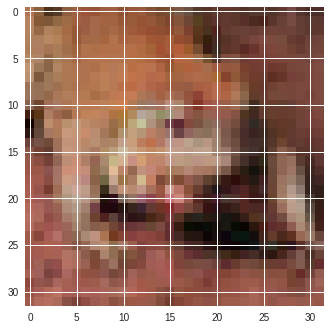

In [0]:
import cv2 
print (acc)
adv_img.shape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# norm_image = cv2.normalize(adv_img[3], None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)


plt.imshow(adv_img[5])


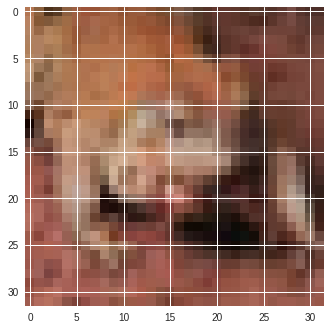

In [0]:
plt.imshow(x_test[5])

0.1067


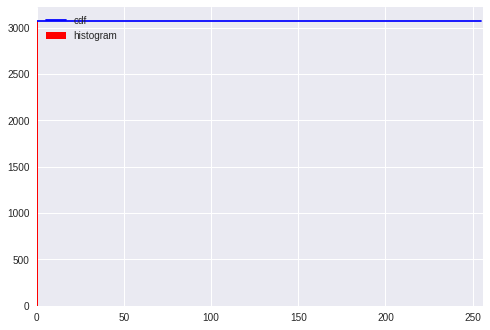

In [0]:
import cv2 
print (acc)
adv_img.shape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


adv_img = np.load("attack_images_np.npy")
img = adv_img[5]
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [0]:
folder_num = 1
file_string = "attack_images_np_" + str(folder_num) +".npy"
print (file_string)

attack_images_np_1.npy
